<a href="https://colab.research.google.com/github/AmalKhaled28/Loan-Approval-Prediction-Description/blob/main/Loan_Approval_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U scikit-learn imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 43.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

##  Data Loading

In [2]:
df = pd.read_csv('/content/loan_data.csv')
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


# Data Exploration

In [3]:
df.shape

(45000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [5]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.isna().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


Key Findings

Size: 45,000 applications
Data Quality:

No missing values
No duplicates → Clean dataset


Target: loan_status → Binary classification task (1 = Approved, 0 = Rejected)

# visualization - Numeric Features

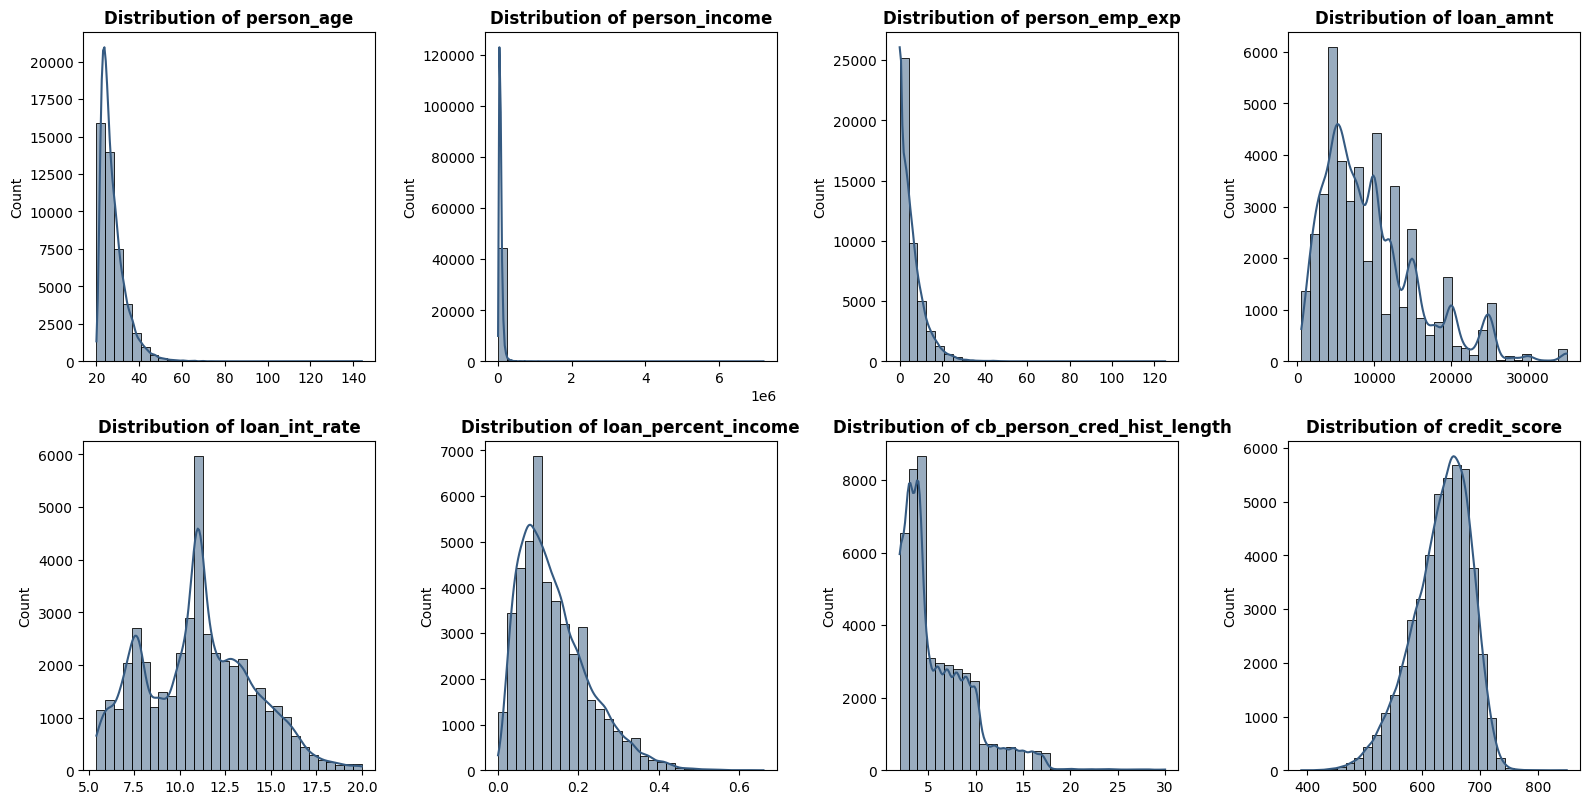

In [8]:
num_cols = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
            'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']

rows = (len(num_cols) + 2) // 3
fig, axes = plt.subplots(rows, 4, figsize=(16, rows * 4))
axes = axes.ravel()

for i, col in enumerate(num_cols):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i], bins=30, color='#355a81')
    axes[i].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


Insights

- Most features right-skewed (income, age, loan amount)
- credit_score: Normal distribution (~600–700)
- loan_percent_income: Few > 0.5 → high risk

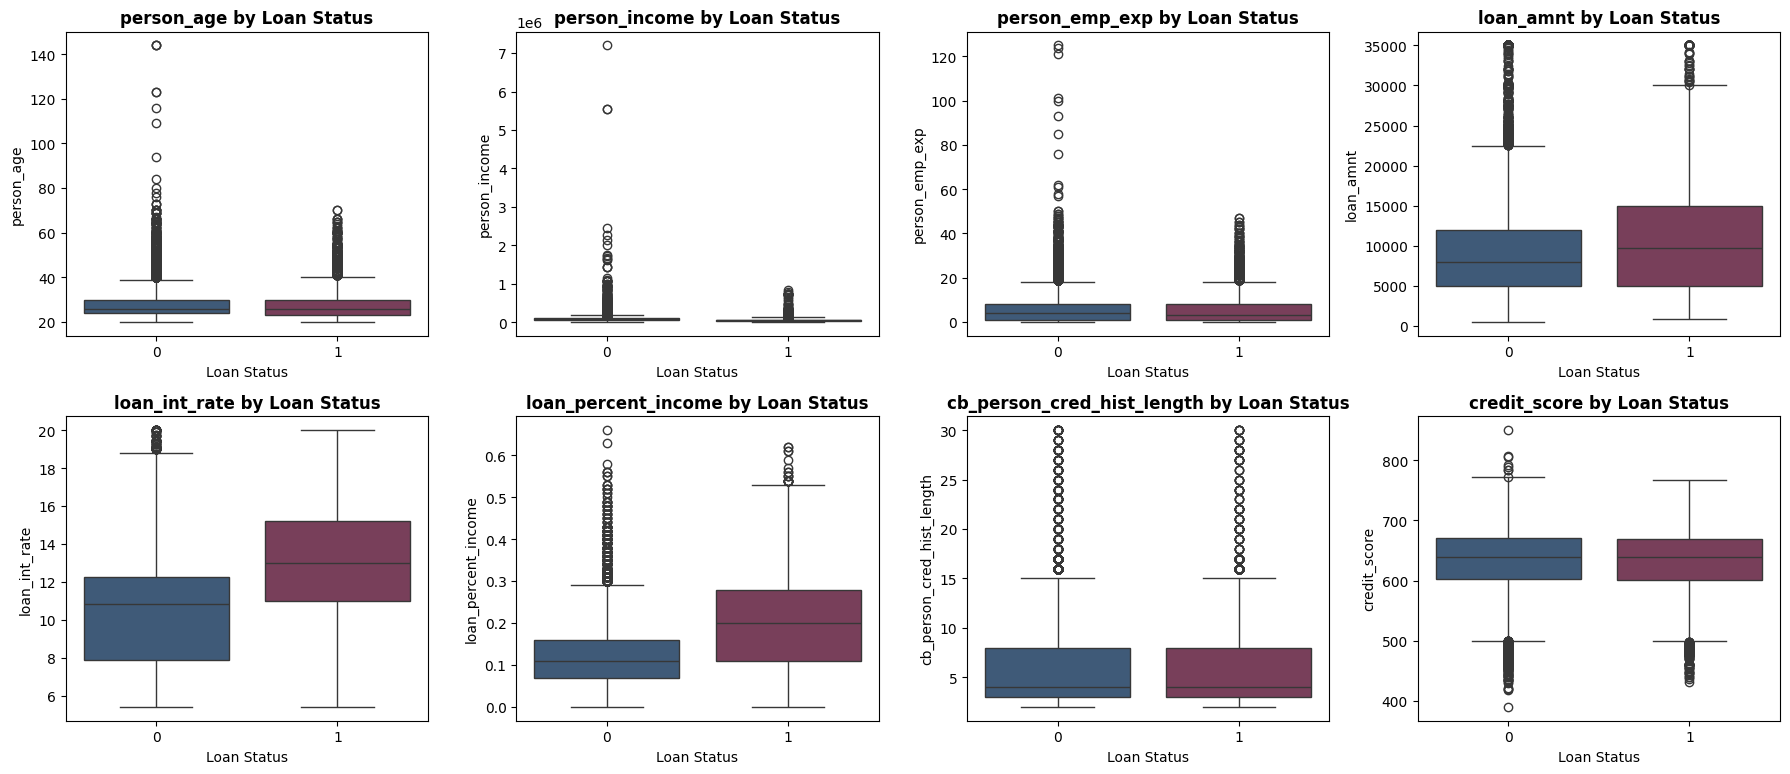

In [12]:
tetradic_colors = ['#355a81', '#81355a', '#5a8135', '#816335']

rows = (len(num_cols) + 3) // 4

fig, axes = plt.subplots(rows, 4, figsize=(18, rows * 4))
axes = axes.ravel()

for i, col in enumerate(num_cols):
    sns.boxplot(data=df, x='loan_status', y=col, ax=axes[i], palette=tetradic_colors)
    axes[i].set_title(f'{col} by Loan Status', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Loan Status')

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


In [13]:
outliers_summary = []

print("Outliers Detection (IQR Method):\n")
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # عدد الـ Outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    n_outliers = len(outliers)
    percent = (n_outliers / len(df)) * 100

    print(f"{col}:")
    print(f"  Q1 = {Q1:.2f}, Q3 = {Q3:.2f}, IQR = {IQR:.2f}")
    print(f"  Lower Bound = {lower_bound:.2f}, Upper Bound = {upper_bound:.2f}")
    print(f"  Outliers = {n_outliers} ({percent:.2f}%)")
    print(f"  Min = {df[col].min():.2f}, Max = {df[col].max():.2f}\n")



outliers_df = pd.DataFrame(outliers_summary)


Outliers Detection (IQR Method):

person_age:
  Q1 = 24.00, Q3 = 30.00, IQR = 6.00
  Lower Bound = 15.00, Upper Bound = 39.00
  Outliers = 2188 (4.86%)
  Min = 20.00, Max = 144.00

person_income:
  Q1 = 47204.00, Q3 = 95789.25, IQR = 48585.25
  Lower Bound = -25673.88, Upper Bound = 168667.12
  Outliers = 2218 (4.93%)
  Min = 8000.00, Max = 7200766.00

person_emp_exp:
  Q1 = 1.00, Q3 = 8.00, IQR = 7.00
  Lower Bound = -9.50, Upper Bound = 18.50
  Outliers = 1724 (3.83%)
  Min = 0.00, Max = 125.00

loan_amnt:
  Q1 = 5000.00, Q3 = 12237.25, IQR = 7237.25
  Lower Bound = -5855.88, Upper Bound = 23093.12
  Outliers = 2348 (5.22%)
  Min = 500.00, Max = 35000.00

loan_int_rate:
  Q1 = 8.59, Q3 = 12.99, IQR = 4.40
  Lower Bound = 1.99, Upper Bound = 19.59
  Outliers = 124 (0.28%)
  Min = 5.42, Max = 20.00

loan_percent_income:
  Q1 = 0.07, Q3 = 0.19, IQR = 0.12
  Lower Bound = -0.11, Upper Bound = 0.37
  Outliers = 744 (1.65%)
  Min = 0.00, Max = 0.66

cb_person_cred_hist_length:
  Q1 = 3.00,

Key Insights


People with higher income are more likely to get approved.


Smaller loan amounts are usually approved, while bigger ones are often rejected.


Loans with high interest rates are mostly rejected.


When the loan is more than 50% of income, it’s almost always rejected.


A higher credit score greatly increases the chance of approval.



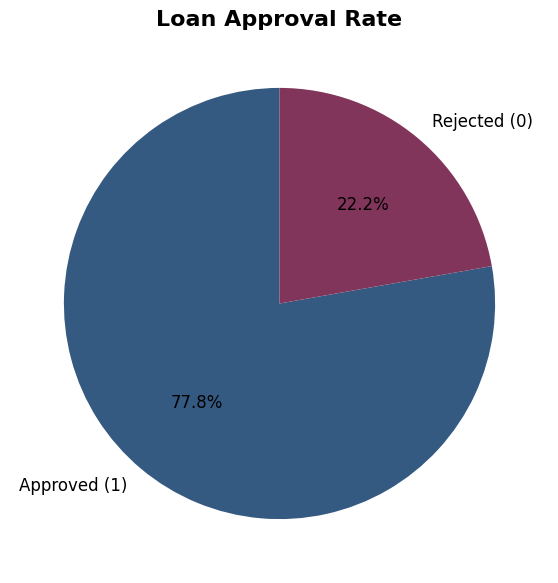

In [15]:
plt.figure(figsize=(7, 7))
df['loan_status'].value_counts().plot.pie(
    autopct='%1.1f%%', startangle=90, colors=['#355a81', '#81355a'],
    labels=['Approved (1)', 'Rejected (0)'], textprops={'fontsize': 12}
)
plt.title('Loan Approval Rate', fontsize=16, fontweight='bold')
plt.ylabel('')
plt.show()

**Insight**  
- **77.8% Approved**  
- **22.2% Rejected**  
→ **Severe class imbalance** (≈ 3.5:1)  
→ **Must use SMOTE + class weighting** to prevent bias

# Visualization - Categorical Features

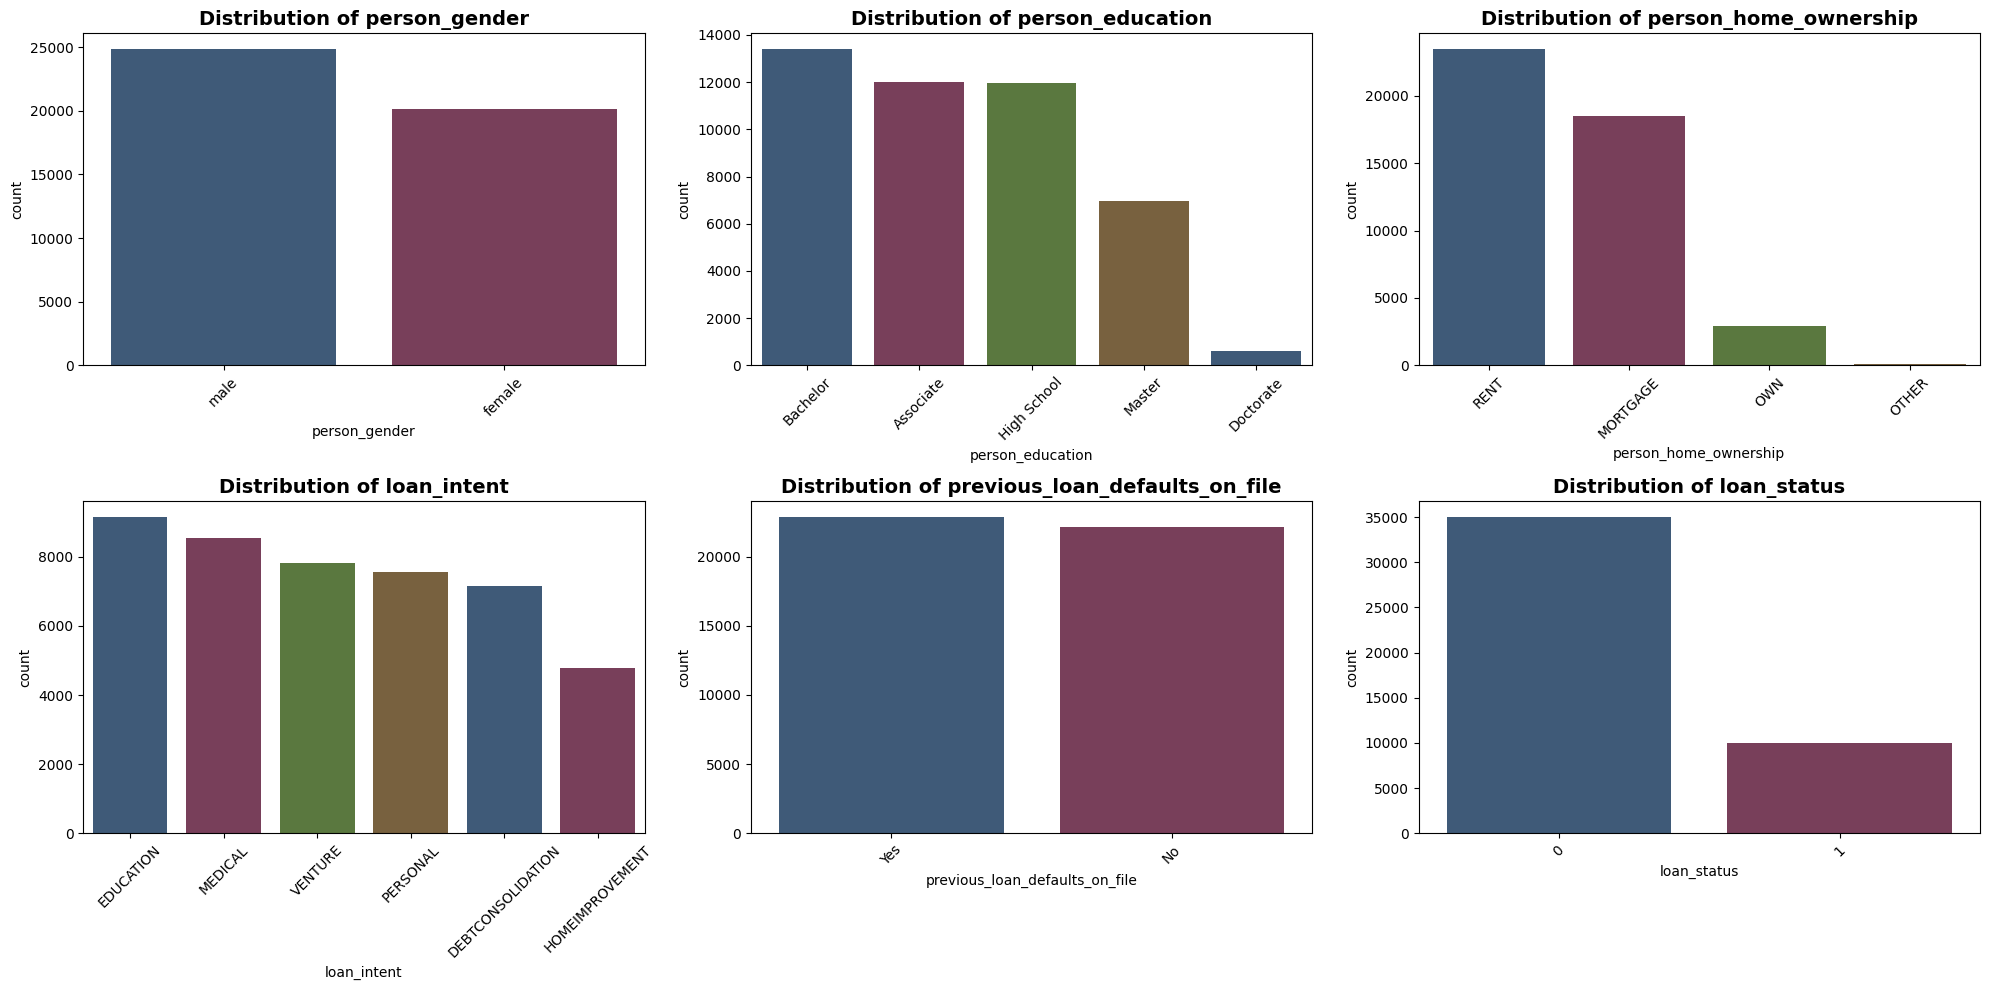

In [20]:
cat_cols = ['person_gender', 'person_education', 'person_home_ownership',
            'loan_intent', 'previous_loan_defaults_on_file', 'loan_status']

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = axes.ravel()

for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index , palette=tetradic_colors)
    axes[i].set_title(f'Distribution of {col}', fontsize=14, fontweight='bold')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Unique Value

Display the number of unique values in each column

In [17]:
df.nunique()

,0
person_age,60
person_gender,2
person_education,5
person_income,33989
person_emp_exp,63
person_home_ownership,4
loan_amnt,4483
loan_intent,6
loan_int_rate,1302
loan_percent_income,64


In [18]:
# categorical_columns
cat_cols = ['person_gender', 'person_education', 'person_home_ownership',
            'loan_intent', 'previous_loan_defaults_on_file']
print("Categorical Columns:")
print(cat_cols)

print("\nUnique values per categorical column:\n")
for col in cat_cols:
    print(f"{col}: {df[col].unique()}\n")

Categorical Columns:
['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']

Unique values per categorical column:

person_gender: ['female' 'male']

person_education: ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']

person_home_ownership: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']

loan_intent: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']

previous_loan_defaults_on_file: ['No' 'Yes']



# Feature Engineering: Creating `high_risk` Flag

In [19]:
df['high_risk'] = 0
df.loc[(df['loan_percent_income'] > 0.5) | (df['person_age'] > 70), 'high_risk'] = 1


Purpose
Create a binary risk indicator based on two strong red flags:

Debt-to-income > 50% → unsustainable
Age > 70 → rare + high default risk

# Encode categorical variables

Preprocessing
- **LabelEncoder**: For categorical → tree models  
- **StandardScaler**: Normalize numeric → consistent scale  
- **Order**: Split → Scale → SMOTE

In [21]:
le_dict = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le
    print(f"{col}: {dict(zip(le.classes_, le.transform(le.classes_)))}\n")

print("Encoding done. High risk count:", df['high_risk'].sum())

person_gender: {'female': np.int64(0), 'male': np.int64(1)}

person_education: {'Associate': np.int64(0), 'Bachelor': np.int64(1), 'Doctorate': np.int64(2), 'High School': np.int64(3), 'Master': np.int64(4)}

person_home_ownership: {'MORTGAGE': np.int64(0), 'OTHER': np.int64(1), 'OWN': np.int64(2), 'RENT': np.int64(3)}

loan_intent: {'DEBTCONSOLIDATION': np.int64(0), 'EDUCATION': np.int64(1), 'HOMEIMPROVEMENT': np.int64(2), 'MEDICAL': np.int64(3), 'PERSONAL': np.int64(4), 'VENTURE': np.int64(5)}

previous_loan_defaults_on_file: {'No': np.int64(0), 'Yes': np.int64(1)}

loan_status: {np.int64(0): np.int64(0), np.int64(1): np.int64(1)}

Encoding done. High risk count: 70


# **Split data**

In [22]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# **Scale numeric features** (StandardScaler)

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to balance classes

In [25]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)
print(f"After SMOTE: {len(y_train_bal)} samples (balanced)")

After SMOTE: 56000 samples (balanced)


Why SMOTE?

78% Approved vs 22% Rejected → Severe imbalance
Model would predict "Approved" most of the time → high accuracy, low real performance
SMOTE creates synthetic Rejected samples → forces model to learn rejection patterns

# Random Forest Model

In [26]:
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)
model.fit(X_train_bal, y_train_bal)

,n_estimators,200
,criterion,'gini'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [27]:
# Prediction
y_pred = model.predict(X_test_scaled)

In [28]:
# Evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      7000
           1       0.75      0.87      0.80      2000

    accuracy                           0.91      9000
   macro avg       0.85      0.89      0.87      9000
weighted avg       0.91      0.91      0.91      9000



In [29]:
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.3f}")

F1-Score: 0.804


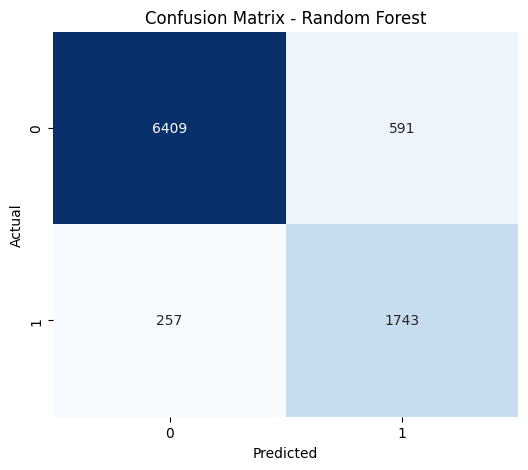

In [30]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

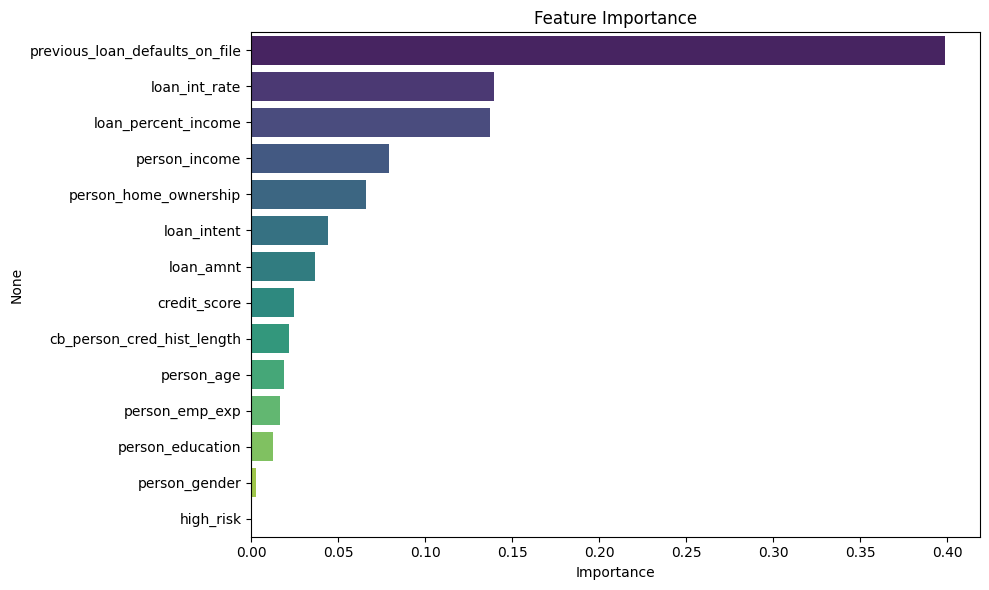

In [31]:
importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=importance.values, y=importance.index, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

> **Top feature**: `previous_loan_defaults_on_file` → instant reject

# Bonus: Model Comparison (Logistic vs Tree vs Random Forest)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

models = {
    'Logistic': LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    'Tree': DecisionTreeClassifier(max_depth=15, class_weight='balanced', random_state=42),
    'Random Forest': model
}

for name, clf in models.items():
    clf.fit(X_train_bal, y_train_bal)
    y_pred = clf.predict(X_test_scaled)
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred))


=== Logistic ===
              precision    recall  f1-score   support

           0       0.97      0.83      0.90      7000
           1       0.61      0.91      0.73      2000

    accuracy                           0.85      9000
   macro avg       0.79      0.87      0.81      9000
weighted avg       0.89      0.85      0.86      9000


=== Tree ===
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      7000
           1       0.72      0.83      0.77      2000

    accuracy                           0.89      9000
   macro avg       0.83      0.87      0.85      9000
weighted avg       0.90      0.89      0.89      9000


=== Random Forest ===
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      7000
           1       0.75      0.87      0.80      2000

    accuracy                           0.91      9000
   macro avg       0.85      0.89      0.87      9000
weighted avg       

Random Forest is the best choice for production